# Anomaly Detection

1. [Supervised Learning](#Supervised-Learning)  
    - Dataset 1 - Credit Card Fraud Detection (source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)  
    - Techniques used and results 

2. [Unsupervised Learning](#Unsupervised-Learning)  
    - Dataset 2 -   
    - Techniques used and results

### Summary




==================================================================================
### Types of Anomalies:
- Point Anomalies:  
    Individual data points that are significantly different from the rest of the data.
- Contextual Anomalies:  
    Data points that are anomalous only within a specific context (e.g., high network traffic at 3 AM is normal, but at 3 PM might be an anomaly).
- Collective Anomalies:  
    A group of related data points that collectively represent an anomaly, even if individual points are not anomalous on their own.

### Machine Learning Approaches:  
Anomaly detection utilizes various machine learning techniques, broadly categorized as:
##### Supervised :  
Requires labeled datasets with both normal and anomalous data points. Algorithms like: 
- logistic regression, 
- decision trees, random forests, and 
- neural networks can be trained to classify new data as normal or anomalous. This approach is effective when anomalies are well-defined and sufficient labeled data is available. 
##### Unsupervised :
Identifies anomalies without requiring labeled data by learning the underlying patterns of normal data and flagging deviations. This is particularly useful when anomalies are rare or unknown in advance. Common algorithms include:   
- Isolation Forest: An ensemble method that isolates anomalies by building a tree structure.  
- One-Class SVM (OCSVM): A variant of Support Vector Machines that learns a boundary around normal data, classifying points outside this boundary as anomalies.  
- K-Nearest Neighbors (KNN): Anomaly scores are based on the distance to the K-nearest neighbors, with distant points being potential anomalies.   
- Autoencoders: Neural networks that learn a compressed representation of data; high reconstruction error can indicate an anomaly.  
- Clustering-based methods (e.g., K-Means): Identifies anomalies as data points that do not belong to any cluster or are far from cluster centroids.   
##### Semi-supervised :
Combines aspects of both supervised and unsupervised learning, often using a small amount of labeled data to guide the learning process.



<a name='Supervised-Learning'></a>
## Supervised Learning

1. [Data preparation and visualization](#step-1-data-preparation-and-visualization)
2. Model development
3. Model evaluation

In [29]:
# Unzip the credit card file, load data to dataframe, then delete the large unzipped csv file

# ==========================
# print all files in the current directory
# import os
# for dirname, _, filenames in os.walk('./'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
# ==========================

# Step 1: unzip file
from zipfile import ZipFile
with ZipFile('./data/credit-card-fraud/creditcard.csv.zip', 'r') as zip_object:
    zip_object.extractall('./data/credit-card-fraud/')

# ==========================
# (Optional) If file is too large, we can divide it and load them to datafram.
# Step 2.1: Divide the original credit card fraud file (150.8MB, too large to upload to Github) into smaller size 
# import pandas as pd

# input_csv_file_path = './data/credit-card-fraud/creditcard.csv'
# rows_per_file = 50_000
# output_prefix = 'data/credit-card-fraud/creditcard_part_'

# csv_reader = pd.read_csv(input_csv_file_path, chunksize=rows_per_file)
# for i, chunk in enumerate(csv_reader):
#     output_file = f'{output_prefix}{i}.csv'
#     chunk.to_csv(output_file, index=False)
#     print(f'Created {output_file}')

# Step 2.2: Load files into a data frame
# import pandas as pd
# import glob

# path = './data/credit-card-fraud/'
# all_files = glob.glob(path + "creditcard_part_*.csv")

# df_list = []
# for filename in all_files:
#     df = pd.read_csv(filename)
#     df_list.append(df)
# df = pd.concat(df_list, ignore_index=True)
# ==========================

# Step 2: load data to dataframe
import pandas as pd
df = pd.read_csv('./data/credit-card-fraud/creditcard.csv')

# Step 3: delete the original large csv file
import os
input_csv_file_path = './data/credit-card-fraud/creditcard.csv'
os.remove(input_csv_file_path)

<a name='step-1-data-preparation-and-visualization'></a>
### Step 1. Data Preparation and Visualization

In [30]:
df.shape
print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns")

Dataset loaded with 284807 rows and 31 columns


In [31]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [33]:
df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,94813.860,47488.146,0.000,54201.500,84692.000,139320.500,172792.000
V1,284807.0,0.000,1.959,-56.408,-0.920,0.018,1.316,2.455
V2,284807.0,0.000,1.651,-72.716,-0.599,0.065,0.804,22.058
V3,284807.0,-0.000,1.516,-48.326,-0.890,0.180,1.027,9.383
V4,284807.0,0.000,1.416,-5.683,-0.849,-0.020,0.743,16.875
V5,284807.0,0.000,1.380,-113.743,-0.692,-0.054,0.612,34.802
V6,284807.0,0.000,1.332,-26.161,-0.768,-0.274,0.399,73.302
V7,284807.0,-0.000,1.237,-43.557,-0.554,0.040,0.570,120.589
V8,284807.0,0.000,1.194,-73.217,-0.209,0.022,0.327,20.007
V9,284807.0,-0.000,1.099,-13.434,-0.643,-0.051,0.597,15.595


In [34]:
# Checking missing data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. count null values in each column
null_counts_per_column = df.isna().sum()
print(f'Columns with null values:\n{null_counts_per_column[null_counts_per_column > 0]}\n')

# 2. get percentage of null values per column
percentage_nulls = (df.isna().sum() / len(df)) * 100
print(f'Percentage of null values per column:\n{percentage_nulls[percentage_nulls > 0]}\n')

# Visualize missing values if any
if null_counts_per_column.sum() > 0:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isna(), cbar=False, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.tight_layout()
    plt.show()

Columns with null values:
Series([], dtype: int64)

Percentage of null values per column:
Series([], dtype: float64)



In [35]:
# Check and drop duplicated rows
print(df.duplicated().sum())
df.drop_duplicates(inplace=True, ignore_index=True)
df.shape

1081


(283726, 31)

In [36]:
# Class distribution
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

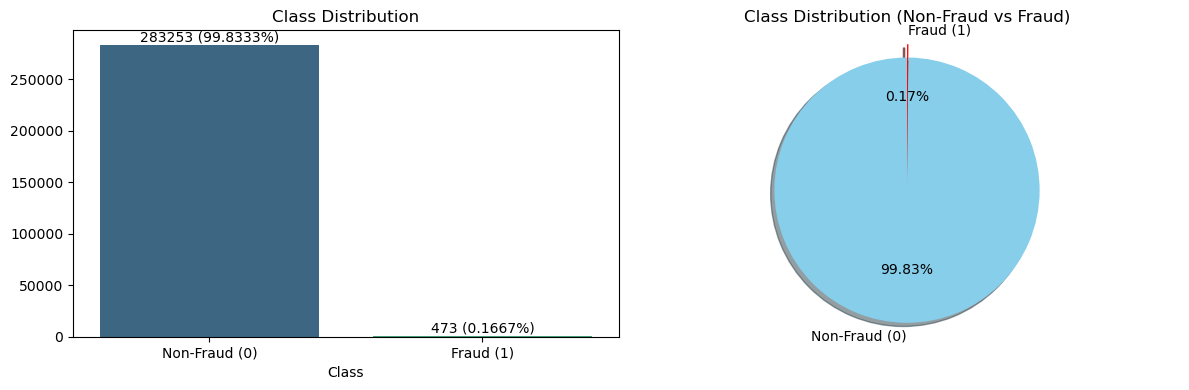

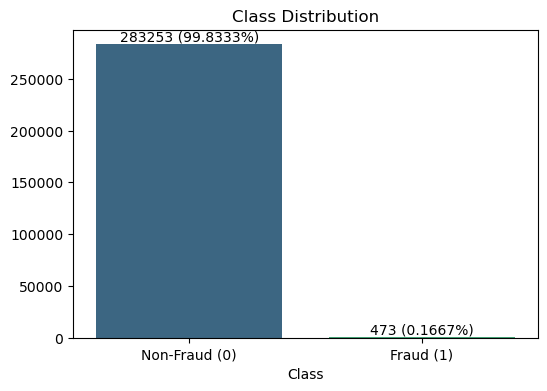

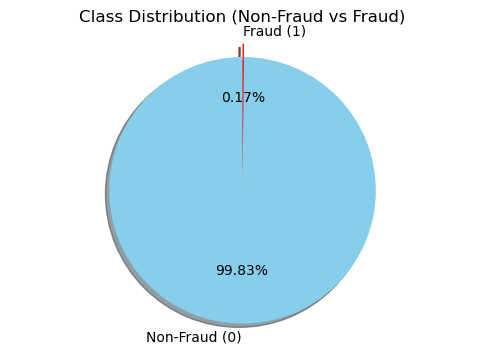

In [ ]:
# Visualize class distribution
# Draw all plots in one canvas
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

class_counts = df['Class'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis', hue=class_counts.index, legend=False, ax=ax1)
ax1.set_title('Class Distribution')
ax1.set_xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
for i, v in enumerate(class_counts.values):
    ax1.text(i, v + 500, f'{v} ({v/df.shape[0]*100:.4f}%)', ha='center', va='bottom', fontsize=10)

ax2.pie(class_counts, labels=['Non-Fraud (0)', 'Fraud (1)'], autopct='%1.2f%%', colors=['skyblue', 'red'], explode=[0, 0.1], shadow=True, startangle=90)
ax2.set_title('Class Distribution (Non-Fraud vs Fraud)')
ax2.axis('equal')

plt.tight_layout() # Adjust layout to prevent titles/labels from overlapping
plt.show()


# ==========================
# Alternative way of ploting. Draw each plot seperately
# bar plot
plt.figure(figsize=(6, 4))
class_counts = df['Class'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis', hue=class_counts.index, legend=False)
plt.title('Class Distribution')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 500, f'{v} ({v/df.shape[0]*100:.4f}%)', ha='center', va='bottom', fontsize=10)
plt.show()

# pie chart
plt.figure(figsize=(6, 4))
plt.pie(class_counts, labels=['Non-Fraud (0)', 'Fraud (1)'], autopct='%1.2f%%', colors=['skyblue', 'red'], explode=[0, 0.1], shadow=True, startangle=90)
plt.title('Class Distribution (Non-Fraud vs Fraud)')
plt.axis('equal')
plt.show()
# ==========================


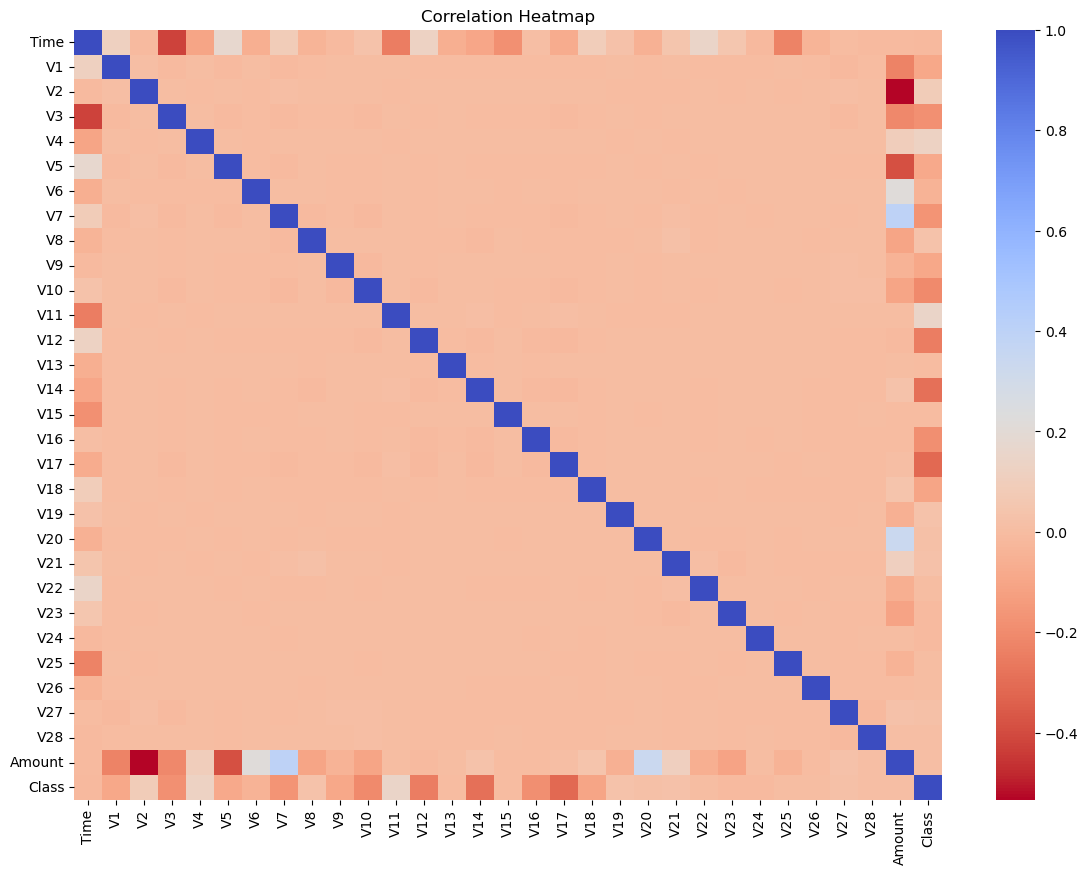

In [40]:
# Correlation matrix with heatmap
plt.figure(figsize=(14,10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot=False)
plt.title('Correlation Heatmap')
plt.show()


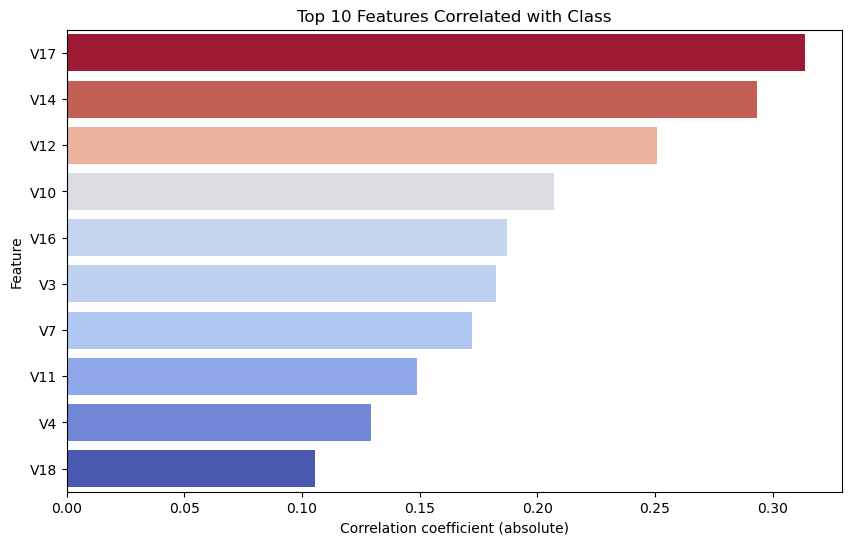

In [50]:
# Top 10 features most correlated with fraud
corr_target = corr['Class'].drop('Class')
top_features = corr_target.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='coolwarm', hue=top_features.values, legend=False)
plt.title('Top 10 Features Correlated with Class')
plt.xlabel("Correlation coefficient (absolute)")
plt.ylabel('Feature')
plt.show()

<a name='Unsupervised-Learning'></a>
## Unsupervised Learning